### Warehouse Search 1

#### Generate environment

- Regular wharehouse (no paths blocked)
    - Number of obsctacles is static
- Random wharehouse (paths can be blocked)
    - Number of obstacles can be changed 
- Dimensions can be changed
- Only one robot is working
- Only one package is retrieved

In [1]:
from src.environment import Environment, WarehouseTypeEnum
from src.algorithms import Search, AlgorithmTypeEnum, HeuristicEnum
from src.utils import visualize_warehouse, visualize_working_path
from src.robot_handler import MultiRobotHandler

env = Environment(WarehouseTypeEnum.Regular,rows = 120, cols = 120, n_packages=1, n_robots=1)
# env = Environment(WarehouseTypeEnum.Random,rows = 1000, cols = 1000, obstacle_count=2000)

### Uninformed search

- #### **Breadth First search (BFS) algorithm**

Cost to Package:  88.0  units of time
Solution found with cost of:  178.0  units of time
Search Time:  0.09827518463134766 seconds
Total Time:  178.09827518463135 seconds (assuming unit of time is second)  with  Breadth First Search (BFS)


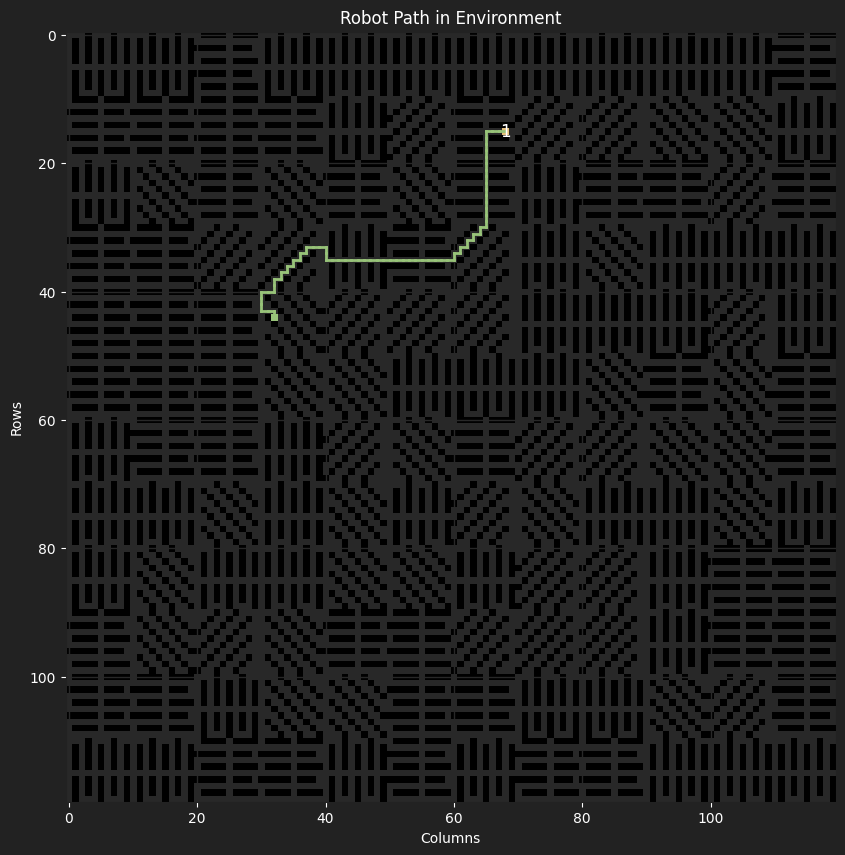

In [2]:
search_bfs = Search(AlgorithmTypeEnum.BFS, env)
search_bfs.print_cost()

visualize_warehouse(env, search_bfs)

- #### **Diskstra's search algorithm**

Cost to Package:  85.0  units of time
Solution found with cost of:  172.0  units of time
Search Time:  0.08889436721801758 seconds
Total Time:  172.08889436721802 seconds (assuming unit of time is second)  with  Dijkstra's Search


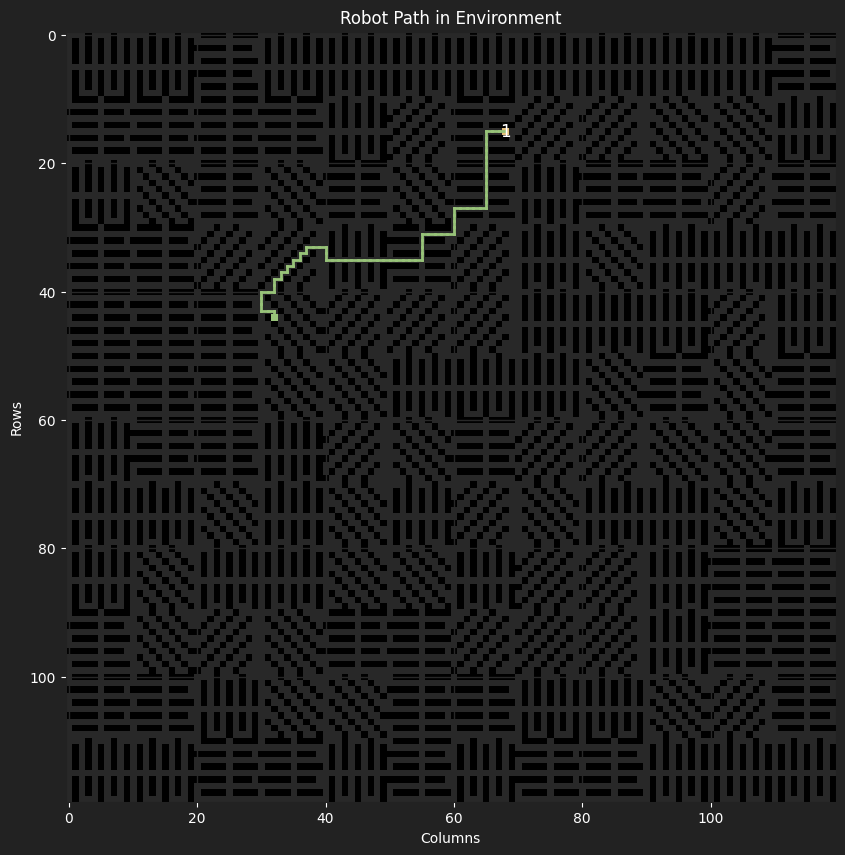

In [3]:
search_dijkstra = Search(AlgorithmTypeEnum.DIJKSTRA, env)
search_dijkstra.print_cost()

visualize_warehouse(env, search_dijkstra)

### Informed search

- #### **A * search algorithm**

Cost to Package:  85.0  units of time
Solution found with cost of:  172.0  units of time
Search Time:  0.026397228240966797 seconds
Total Time:  172.02639722824097 seconds (assuming unit of time is second)  with  A* Search


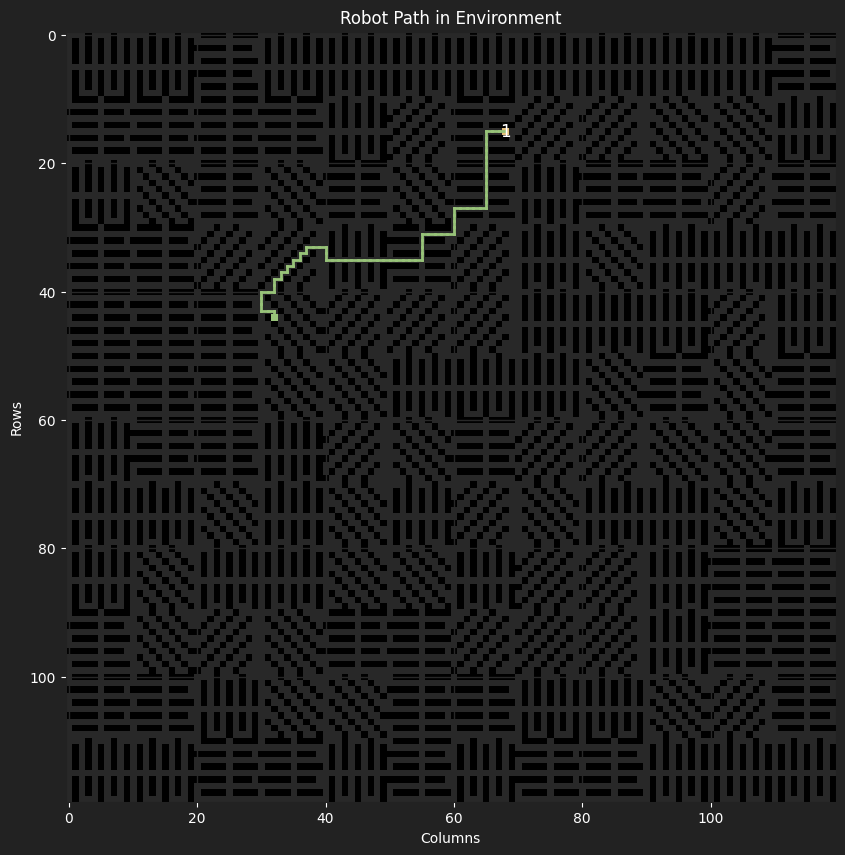

In [6]:
search_a = Search(AlgorithmTypeEnum.A_STAR, env, HeuristicEnum.MANHATTAN)

search_a.print_cost()

visualize_warehouse(env, search_a)

- #### **Iterative Deepening A * (IDA) search algorithm**

Cost to Package:  85.0  units of time
Solution found with cost of:  172.0  units of time
Search Time:  0.023009777069091797 seconds
Total Time:  172.0230097770691 seconds (assuming unit of time is second)  with  Iterative Deepening A* (IDA) Search


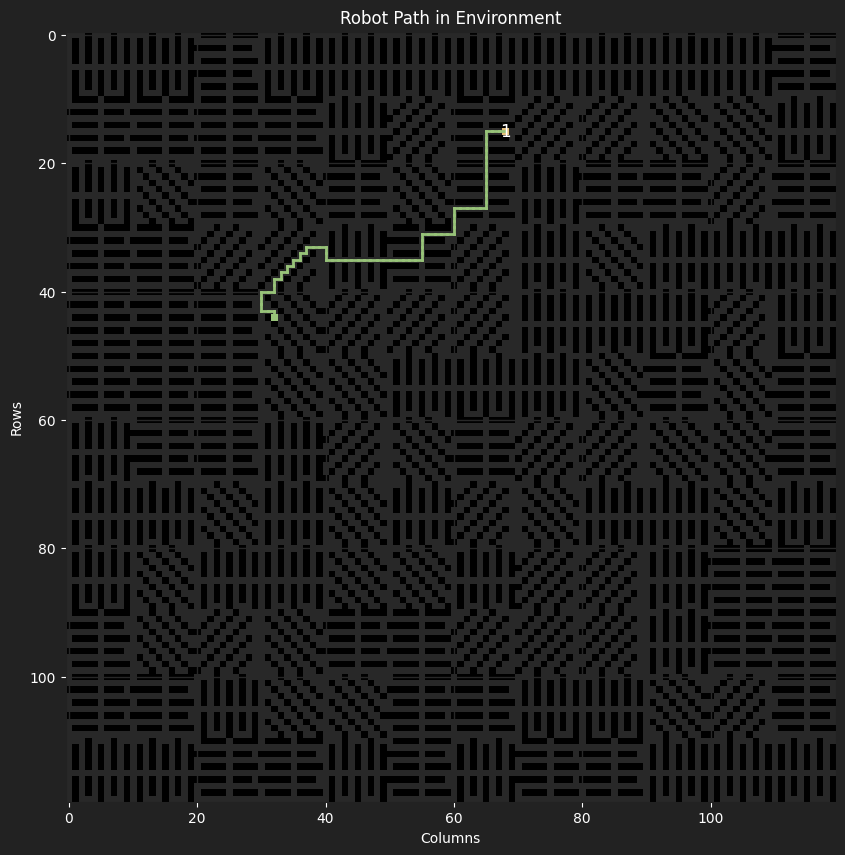

In [7]:
search_ida = Search(AlgorithmTypeEnum.IDA_STAR, env, HeuristicEnum.MANHATTAN)

search_ida.print_cost()

visualize_warehouse(env, search_ida)

### Warehouse Search 2

#### Generate environment

- Regular wharehouse (no paths blocked)
    - Number of obsctacles is static
- Random wharehouse (paths can be blocked)
    - Number of obstacles can be changed 
- Dimensions can be changed
- Only one robot is working
- Multiple Packages Available

In [ ]:
env = Environment(WarehouseTypeEnum.Regular,rows = 120, cols = 120, n_packages=60, n_robots=4)

Robot 0 Working Time: 652.0 units
Robot 1 Working Time: 675.0 units
Robot 2 Working Time: 443.0 units
Robot 3 Working Time: 484.5 units
Total cost (maximum working time + computational time): 675.8648729324341 units


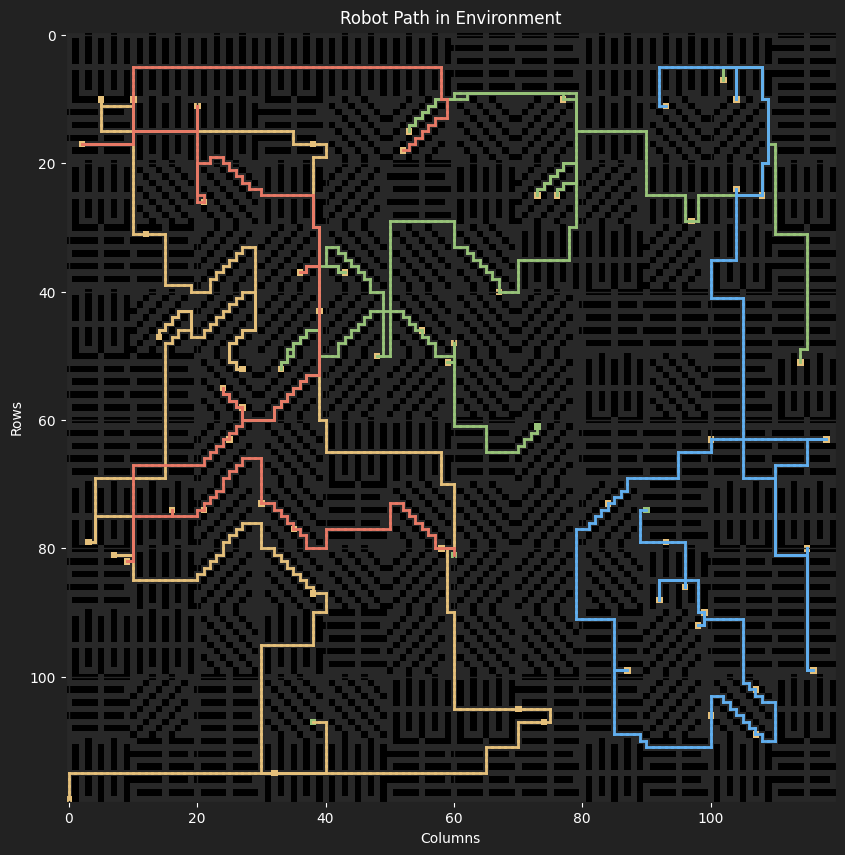

In [12]:
multi_robot_handler = MultiRobotHandler(env, AlgorithmTypeEnum.A_STAR, HeuristicEnum.MANHATTAN)
paths, individual_times, total_cost = multi_robot_handler.plan_paths()

for i, (path, time) in enumerate(zip(paths, individual_times)):
    print(f"Robot {i} Working Time: {time} units")

print(f"Total cost (maximum working time + computational time): {total_cost} units")

visualize_working_path(env, paths)

In [8]:
from src.utils import visualize_data
from src.eval import test_algorithms, test_algorithms_computation, test_heuristic

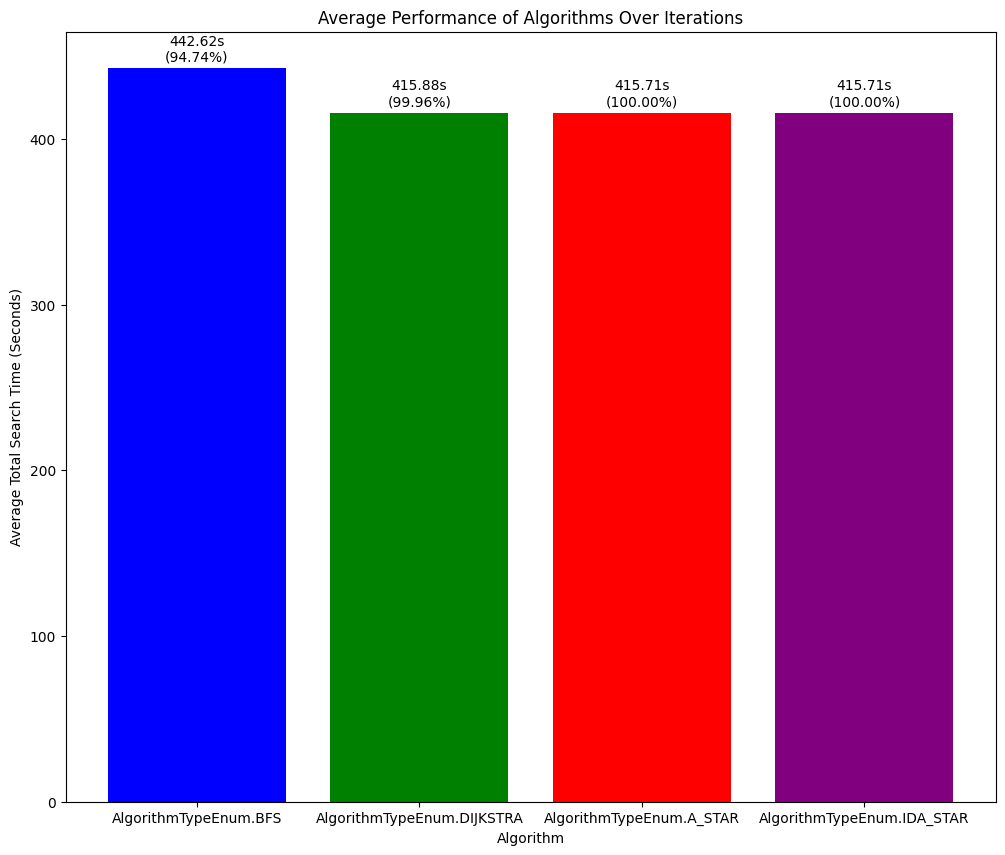

In [4]:
algorithms = [
    AlgorithmTypeEnum.BFS,
    AlgorithmTypeEnum.DIJKSTRA,
    AlgorithmTypeEnum.A_STAR,
    AlgorithmTypeEnum.IDA_STAR,
]

absolute_data, relative_data = test_algorithms(algorithms, HeuristicEnum.MANHATTAN, 5, 200, 200)
visualize_data(absolute_data, relative_data)

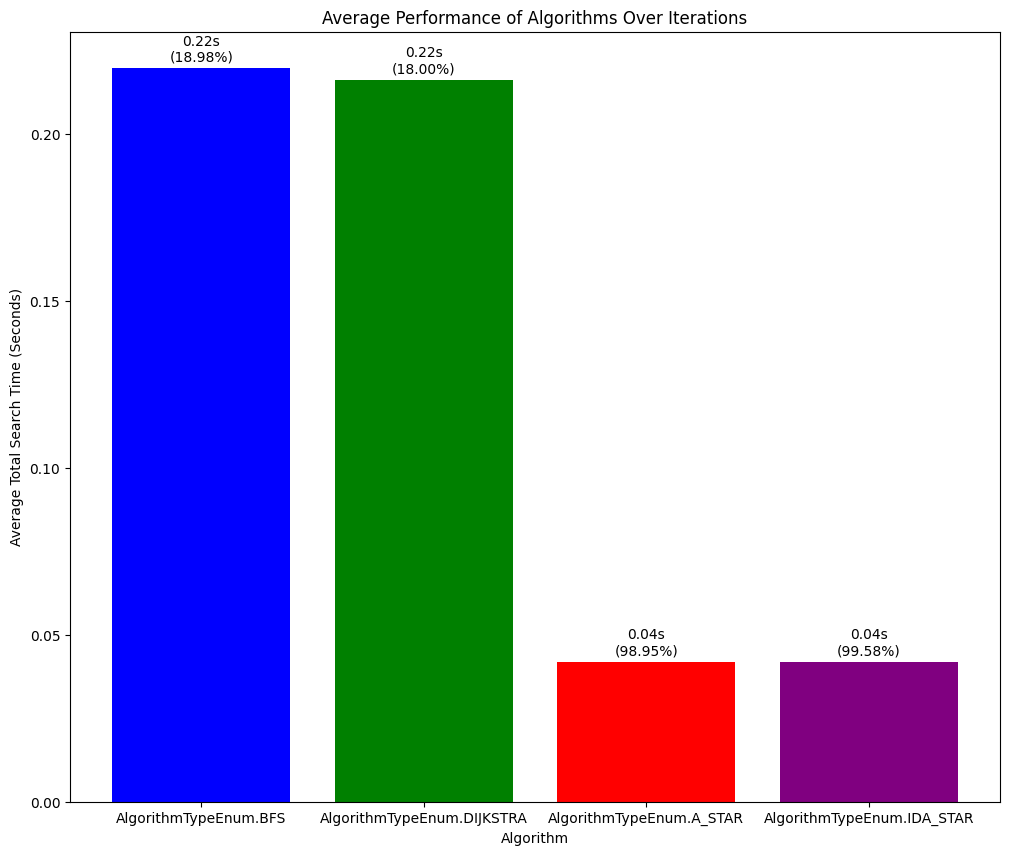

In [5]:
algorithms = [
    AlgorithmTypeEnum.BFS,
    AlgorithmTypeEnum.DIJKSTRA,
    AlgorithmTypeEnum.A_STAR,
    AlgorithmTypeEnum.IDA_STAR,
]

absolute_data, relative_data = test_algorithms_computation(algorithms, HeuristicEnum.MANHATTAN, 20, 200, 200)
visualize_data(absolute_data, relative_data)

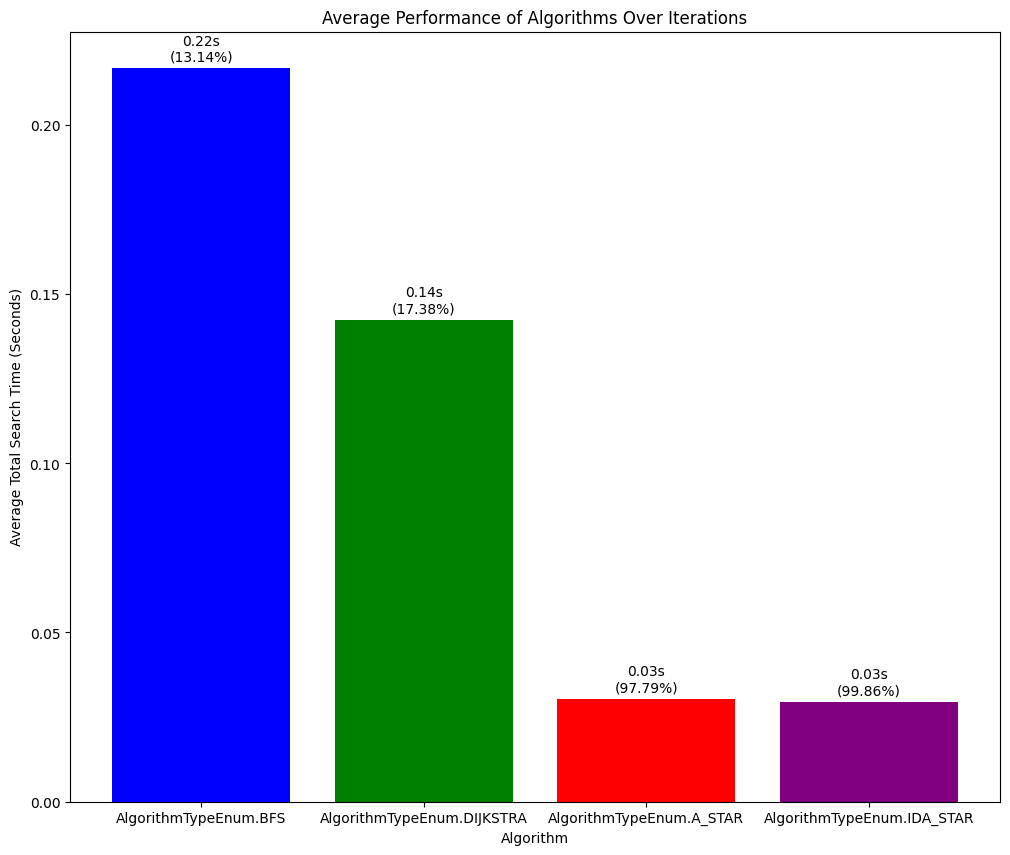

In [10]:
algorithms = [
    AlgorithmTypeEnum.BFS,
    AlgorithmTypeEnum.DIJKSTRA,
    AlgorithmTypeEnum.A_STAR,
    AlgorithmTypeEnum.IDA_STAR,
]

absolute_data, relative_data = test_algorithms_computation(algorithms, HeuristicEnum.MANHATTAN, 5, 200, 200)
visualize_data(absolute_data, relative_data)

In [11]:
heuristics = [
    HeuristicEnum.MANHATTAN,
    HeuristicEnum.EUCLIDEAN,
]

absolute_data, relative_data = test_heuristic(heuristics, 5, 200, 200)
visualize_data(absolute_data, relative_data)

'Search' object has no attribute '_heuristic_type'
No path is available!


AttributeError: 'Search' object has no attribute 'search_time'